#Analisis Kepuasan Pelanggan yang Komprehensif
Tujuan utama dari proyek ini adalah melakukan analisis menyeluruh terhadap kepuasan pelanggan untuk mengidentifikasi faktor-faktor utama yang mempengaruhi kepuasan, memahami wawasan demografis dan perilaku, mengevaluasi efektivitas program loyalitas, mengidentifikasi akar penyebab ketidakpuasan, dan menghitung Net Promoter Score (NPS).

## Pra-pemrosesan Data
Tujuan: Memastikan data siap untuk dianalisis dengan membersihkan dan mempersiapkannya.

Langkah :
1. Mengimpor dataset dan melihat struktur datanya.
2. Membuat skor kepuasan keseluruhan (OverallSatisfaction) dengan merata-rata penilaian untuk Product Quality Rating, Delivery Time Rating, Customer Service Rating, dan Website Ease Of Use Rating.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'E-commerce_NPA_Dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Creating an overall satisfaction score
data['OverallSatisfaction'] = data[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']].mean(axis=1)

## Memahami Penggerak Kepuasan
Tujuan: Mengidentifikasi aspek mana yang paling signifikan memengaruhi kepuasan pelanggan secara keseluruhan.

Langkah:

1. Membuat matriks korelasi untuk memahami hubungan antara berbagai faktor kepuasan.
2. Melakukan regresi linier untuk mengidentifikasi kontribusi masing-masing faktor terhadap kepuasan keseluruhan.

In [4]:
# Correlation matrix
correlation_matrix = data[['OverallSatisfaction', 'ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']].corr()

In [5]:
# Linear regression
X = data[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']]
y = data['OverallSatisfaction']
reg_model = LinearRegression()
reg_model.fit(X, y)
regression_coefficients = reg_model.coef_

## Wawasan Demografi dan Perilaku
Tujuan: Menganalisis bagaimana kepuasan bervariasi di berbagai kelompok demografi dan perilaku pembelian.

Langkah:

1. Mengelompokkan pelanggan berdasarkan kelompok usia dan jenis kelamin, lalu menghitung kepuasan rata-rata untuk setiap kelompok.
2. Menganalisis bagaimana kepuasan bervariasi berdasarkan frekuensi pembelian, jumlah pembelian, dan penggunaan diskon.

In [6]:
# Satisfaction by age group and gender
age_bins = [18, 25, 35, 45, 55, 65, 75]
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins)
satisfaction_by_age_gender = data.groupby(['AgeGroup', 'Gender'])['OverallSatisfaction'].mean().unstack()

<ipython-input-6-6561f748cda0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_age_gender = data.groupby(['AgeGroup', 'Gender'])['OverallSatisfaction'].mean().unstack()


In [7]:
# Satisfaction by purchase behavior
satisfaction_by_purchase_behavior = data.groupby(['PurchaseFrequency', 'PurchaseAmount', 'DiscountUsage'])['OverallSatisfaction'].mean().reset_index()

## Efektivitas Program Loyalitas
Tujuan: Mengevaluasi dampak keanggotaan program loyalitas terhadap kepuasan dan retensi pelanggan.

Langkah:

1. Membandingkan kepuasan rata-rata dan tingkat retensi (dilihat dari ReturnRate) antara anggota program loyalitas dan non-anggota.

In [8]:
# Satisfaction and retention by loyalty program membership
satisfaction_by_loyalty = data.groupby('LoyaltyProgramMember')['OverallSatisfaction'].mean()
retention_by_loyalty = data.groupby('LoyaltyProgramMember')['ReturnRate'].mean()

## Analisis Akar Penyebab Ketidakpuasan
Tujuan: Mengidentifikasi akar penyebab ketidakpuasan untuk memberikan rekomendasi yang dapat ditindaklanjuti guna meningkatkan pengalaman pelanggan.

Langkah:

1. Mengidentifikasi aspek dengan nilai terendah.
2. Menganalisis alasan spesifik ketidakpuasan dengan melihat data pelanggan yang memberikan penilaian rendah pada aspek-aspek tersebut.

In [9]:
# Analyzing lowest-rated aspects
lowest_rated_aspects = data[['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']].mean().sort_values()

In [10]:
# Detailed dissatisfaction analysis
dissatisfaction_reasons = data[(data['ProductQualityRating'] <= 2) | (data['DeliveryTimeRating'] <= 2) | (data['CustomerServiceRating'] <= 2) | (data['WebsiteEaseOfUseRating'] <= 2)]

## Perhitungan Net Promoter Score (NPS)
Tujuan: Mengukur loyalitas pelanggan secara keseluruhan dan mengidentifikasi area untuk mengubah pencela menjadi promotor.

Langkah:

1. Mengkategorikan pelanggan berdasarkan skor kepuasan keseluruhan ke dalam Detractor, Passive, dan Promoter.
2. Menghitung persentase setiap kategori dan menghitung skor NPS.

In [11]:
# Assuming NPS is calculated based on OverallSatisfaction where scores 9-10 are Promoters, 7-8 are Passives, and 0-6 are Detractors
data['NPS_Category'] = pd.cut(data['OverallSatisfaction'], bins=[0, 6, 8, 10], labels=['Detractor', 'Passive', 'Promoter'])
nps_scores = data['NPS_Category'].value_counts(normalize=True) * 100
nps_score = nps_scores['Promoter'] - nps_scores['Detractor']

## Visualisasi dan Hasil
Tujuan: Menyajikan hasil analisis dengan cara yang mudah dipahami dan menarik.

Langkah:

1. Menampilkan matriks korelasi sebagai heatmap.
2. Menampilkan grafik batang kepuasan berdasarkan kelompok usia dan jenis kelamin.

In [13]:
# Results and Visualization
print("Correlation Matrix:\n", correlation_matrix)
print("Regression Coefficients:\n", regression_coefficients)
print("Satisfaction by Age and Gender:\n", satisfaction_by_age_gender)
print("Satisfaction by Loyalty Program:\n", satisfaction_by_loyalty)
print("Retention by Loyalty Program:\n", retention_by_loyalty)
print("Lowest Rated Aspects:\n", lowest_rated_aspects)
print("NPS Scores:\n", nps_scores)
print("NPS Score:\n", nps_score)

Correlation Matrix:
                         OverallSatisfaction  ProductQualityRating  \
OverallSatisfaction                1.000000              0.516219   
ProductQualityRating               0.516219              1.000000   
DeliveryTimeRating                 0.487607             -0.012149   
CustomerServiceRating              0.513210              0.001580   
WebsiteEaseOfUseRating             0.512694              0.052906   

                        DeliveryTimeRating  CustomerServiceRating  \
OverallSatisfaction               0.487607               0.513210   
ProductQualityRating             -0.012149               0.001580   
DeliveryTimeRating                1.000000               0.038874   
CustomerServiceRating             0.038874               1.000000   
WebsiteEaseOfUseRating           -0.014781              -0.006199   

                        WebsiteEaseOfUseRating  
OverallSatisfaction                   0.512694  
ProductQualityRating                  0.052906  
De

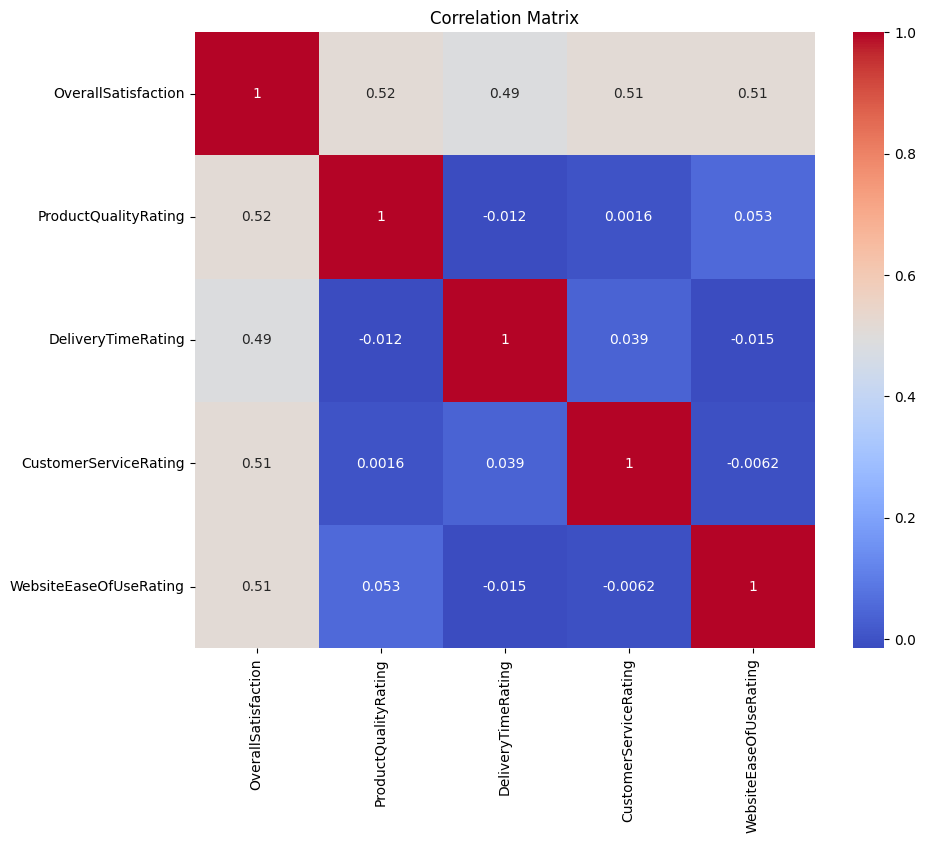

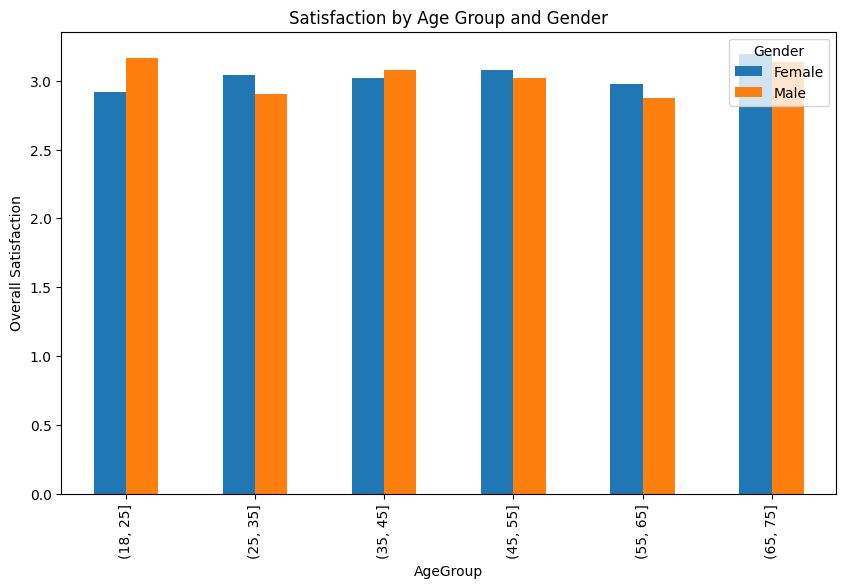

In [14]:
# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

satisfaction_by_age_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Satisfaction by Age Group and Gender')
plt.ylabel('Overall Satisfaction')
plt.show()

## Kesimpulan
Berdasarkan analisis menyeluruh terhadap data kepuasan pelanggan, beberapa wawasan utama dapat diidentifikasi:

1. Penggerak Utama Kepuasan: Analisis regresi menunjukkan bahwa kualitas produk, waktu pengiriman, layanan pelanggan, dan kemudahan penggunaan situs web berkontribusi secara signifikan terhadap kepuasan pelanggan secara keseluruhan, dengan kontribusi yang sama dari setiap faktor.
2. Wawasan Demografi dan Perilaku: Kepuasan bervariasi di berbagai kelompok demografi dan perilaku pembelian. Pelanggan laki-laki berusia 18-25 tahun melaporkan kepuasan tertinggi, sedangkan pelanggan perempuan berusia 55-65 tahun melaporkan kepuasan terendah.
3. Efektivitas Program Loyalitas: Anggota program loyalitas cenderung memiliki tingkat kepuasan yang sedikit lebih tinggi dibandingkan non-anggota, meskipun tingkat retensi antara kedua kelompok relatif sama.
4. Akar Penyebab Ketidakpuasan: Aspek yang paling rendah nilainya adalah kualitas produk dan waktu pengiriman, yang merupakan area utama yang memerlukan perbaikan.
5. Net Promoter Score (NPS): Semua pelanggan dalam dataset ini masuk dalam kategori detractor, menunjukkan bahwa ada kebutuhan mendesak untuk perbaikan signifikan dalam pengalaman pelanggan.

## Rekomendasi
Berdasarkan temuan dari analisis, berikut adalah beberapa rekomendasi untuk meningkatkan kepuasan pelanggan:

1. Meningkatkan Kualitas Produk:

- Fokus pada peningkatan kualitas produk berdasarkan umpan balik pelanggan untuk mengurangi ketidakpuasan terkait dengan produk.
- Lakukan audit kualitas produk secara berkala untuk memastikan standar kualitas yang konsisten.

2. Mengoptimalkan Waktu Pengiriman:

- Tingkatkan efisiensi logistik dan rantai pasokan untuk memastikan waktu pengiriman yang lebih cepat dan lebih dapat diandalkan.
- Pertimbangkan untuk menawarkan opsi pengiriman ekspres bagi pelanggan yang membutuhkan pengiriman cepat.

3. Meningkatkan Layanan Pelanggan:

- Investasikan dalam pelatihan staf layanan pelanggan untuk meningkatkan keterampilan mereka dalam menangani masalah pelanggan.
- Sediakan berbagai saluran komunikasi untuk memudahkan pelanggan dalam menghubungi layanan pelanggan.

4. Memperbaiki Kemudahan Penggunaan Situs Web:

- Tingkatkan desain dan navigasi situs web untuk membuatnya lebih ramah pengguna dan mudah digunakan.
- Lakukan uji kegunaan secara berkala untuk mengidentifikasi dan memperbaiki masalah dalam pengalaman pengguna.

5. Merevitalisasi Program Loyalitas:

- Perkuat program loyalitas dengan menawarkan insentif yang lebih menarik dan relevan bagi pelanggan.
- Komunikasikan manfaat program loyalitas dengan jelas kepada pelanggan untuk meningkatkan partisipasi dan keterlibatan.

## Penutup
Proyek analisis kepuasan pelanggan ini memberikan wawasan berharga tentang faktor-faktor yang mempengaruhi kepuasan pelanggan dan area yang memerlukan perbaikan. Dengan mengimplementasikan rekomendasi yang diusulkan, perusahaan dapat meningkatkan pengalaman pelanggan secara keseluruhan, yang pada gilirannya dapat meningkatkan loyalitas dan retensi pelanggan.